In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# pandas를 이용해서 정형화된 데이터 가져오기.
row_data = pd.read_excel('C:/Users/User/Documents/TjoeunData/titanic.xls')
# 해당 데이터의컬럼 형식, 갯수, null유무 파악
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [3]:
row_data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [4]:
# describe: 튜플의 갯수, 평균, 표준편차, 최소값, 1사분위, 중위수, 3사분위, 최대값 확인
row_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


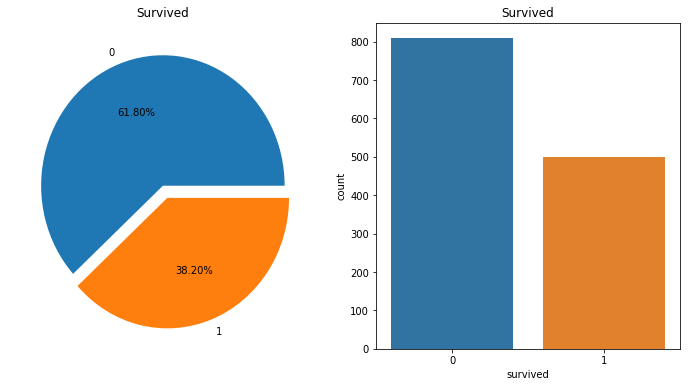

In [5]:
# 그래프를 2개 그리기 위한 (1,2), 그림사이즈(한 그래프당 6X6 크기, 2개.)
# 메모리에 주소 공간 하나 파고(f), 거기에 내용 입력(ax)
f,ax = plt.subplots(1,2,figsize=(12,6))

# survived컬럼에 대한 row데이터 count, 백분율로 각 점유비율 표시, ax[0] = 첫번째 파이차트에 대한 정보 출력
row_data['survived'].value_counts().plot.pie(explode=[0,0.1], 
                                            autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# seaborn의 count플롯을 사용, 2번쨰(ax[1]), count플롯이므로 마찬가지로 데이터의 갯수를 센다.
sns.countplot('survived', data=row_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [6]:
# groupby : 그룹 별로 묶음. 여기선 1, 2, 3등급 으로 나눔(pclass).
row_data.groupby('pclass').mean()
# 1등급이 높다, 3등급이 낮다로 정의함.
# 인사이트: 등급이 높을수록 많이 살았다.
#           나이는 등급이 높을수록 많았다.
#           등급이 낮을수록 동행한 가족/친족이 많았다.

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [7]:
row_data.groupby('pclass').count() # 등급별 인원을 세어봤음.
# 인사이트: 3등급이 인원이 제일 많았다.
#           1등급이 보트를 제일 많이 탔다.

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
pclass,,,,,,,,,,,,,
1,323,323,323,284,323,323,323,323,256,321,201,35,289
2,277,277,277,261,277,277,277,277,23,277,112,31,261
3,709,709,709,501,709,709,709,708,16,709,173,55,195


In [8]:
# 컬럼: 속성, 항목, 요소 => feature
# feature가 많은 경우
#  1) 항목들을 제거
#  2) 항목들이 크게 분석할 것과 상관이 없으면 제거
#     - 수학적 공분산계산: 숫자가 커지면 공분산도 커짐.
#     - 상관도 계산: 숫자를 -1~1사이로 범위로 정해서 상관관계를 계산.
# feature 선택, 전처리: feature-engineering(속성공학)

In [9]:
row_data.corr() # 항목을 지정하지 않았으므로, 각 항목들의 상관도를 구해줌(-1~1)
# 상관관계를 구했는데,
# 0: 컬럼간에 전혀 상관이 없다.
# 1: 완벽히 상관이 있다.(양)
# -1: 완벽히 상관이 있다.(음)
# -+0.3: 약간 상관이 있다.
# -+0.5: 어느 정도 상관이 있다.
# -+0.7: 꽤 큰 상관이 있다.

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


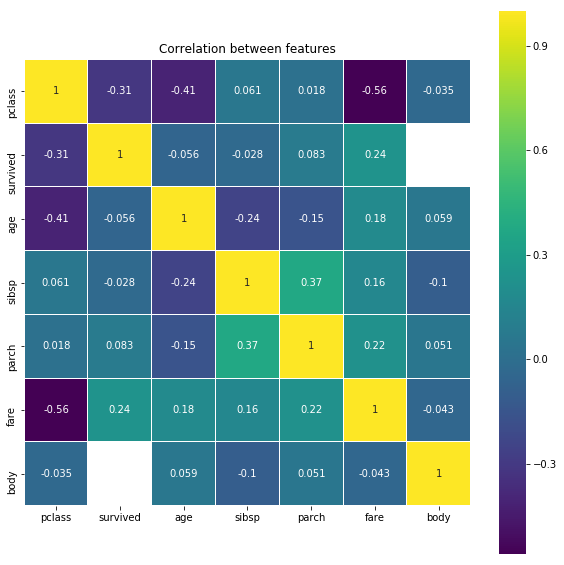

In [10]:
# feature 간 상관을 한눈에 알고 싶으면, 그래프 사용!
# 상관도: heatmap

plt.figure(figsize=(10, 10))
# 히트맵: 색깔별로 상관관계 정도를 표시. 
sns.heatmap(row_data.corr(), linewidths=0.01, square=True,
           annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [11]:
# age 항목에 대해 구간별로 분리. 구간명은 labels, 0~3=baby, 3~7=children 식으로
row_data['age_cat'] = pd.cut(row_data['age'],
                            bins=[0, 3, 7, 15, 30, 60, 100],
                            include_lowest=True,
                            labels=['baby', 'children', 'teenager', 'young', 'adult', 'old'])
# 상위 5개 데이터만 보여줌.
row_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [12]:
row_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenager,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


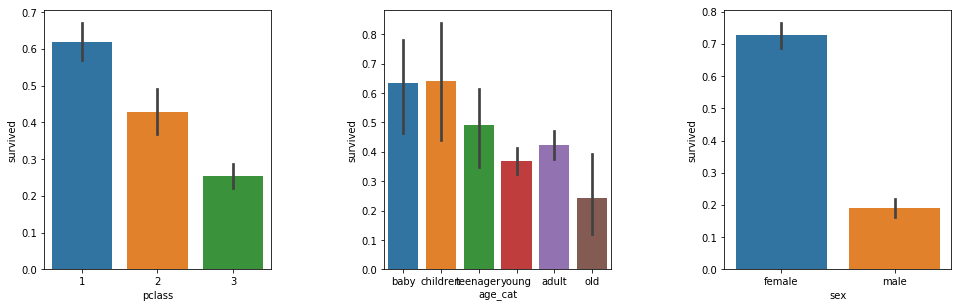

In [13]:
plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=row_data)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=row_data)
plt.subplot(133)
sns.barplot('sex', 'survived', data=row_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

In [14]:
#row_data['boat'].notnull() => true/false
#row_data[row_data['boat'].notnull()]
# => []안에 쓴 조건의 결과가 true인 것만 가져온다. 조건 : not null
boat_survivors = row_data[row_data['boat'].notnull()]
boat_survivors

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",young
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0000,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",young
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0000,0,0,19877,78.8500,NaN,S,6,NaN,NaN,young
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0000,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",old
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0000,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",adult


In [15]:
row_data['boat'].notnull()

0        True
1        True
2       False
3       False
4       False
5        True
6        True
7       False
8        True
9       False
10      False
11       True
12       True
13       True
14       True
15      False
16      False
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25      False
26       True
27       True
28       True
29       True
        ...  
1279    False
1280    False
1281    False
1282    False
1283    False
1284    False
1285    False
1286     True
1287    False
1288    False
1289    False
1290    False
1291    False
1292    False
1293    False
1294    False
1295    False
1296    False
1297    False
1298    False
1299     True
1300    False
1301    False
1302    False
1303    False
1304    False
1305    False
1306    False
1307    False
1308    False
Name: boat, Length: 1309, dtype: bool

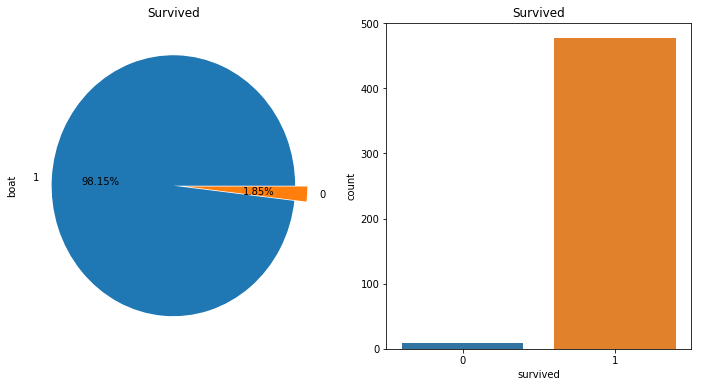

In [16]:
# 보트 탄 사람들 중 생존자/비생존자를 파이차트와 카운트플롯으로 그려보세요.
f,ax = plt.subplots(1, 2, figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('boat')

sns.countplot('survived', data=boat_survivors, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [17]:
row_data.dtypes

pclass          int64
survived        int64
name           object
sex            object
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked       object
boat           object
body          float64
home.dest      object
age_cat      category
dtype: object

In [18]:
row_data['name']

0                           Allen, Miss. Elisabeth Walton
1                          Allison, Master. Hudson Trevor
2                            Allison, Miss. Helen Loraine
3                    Allison, Mr. Hudson Joshua Creighton
4         Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                     Anderson, Mr. Harry
6                       Andrews, Miss. Kornelia Theodosia
7                                  Andrews, Mr. Thomas Jr
8           Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                                 Artagaveytia, Mr. Ramon
10                                 Astor, Col. John Jacob
11      Astor, Mrs. John Jacob (Madeleine Talmadge Force)
12                          Aubart, Mme. Leontine Pauline
13                           Barber, Miss. Ellen "Nellie"
14                   Barkworth, Mr. Algernon Henry Wilson
15                                    Baumann, Mr. John D
16                               Baxter, Mr. Quigg Edmond
17        Baxt

In [19]:
# 컬럼 name 항목의 첫번째 데이터 가져오기.
row_data['name'][0]

'Allen, Miss. Elisabeth Walton'

In [20]:
# ',' 를 기준으로 리스트 만들기
row_data['name'][0].split(',')

['Allen', ' Miss. Elisabeth Walton']

In [21]:
# 만들어진 리스트에서 두번째 요소
row_data['name'][0].split(',')[1]

' Miss. Elisabeth Walton'

In [22]:
# '.' 을 기준으로 다시 나누고 거기서 첫번째 요소
row_data['name'][0].split(',')[1].split('.')[0]

' Miss'

In [23]:
# 공백 지우기(strip)
row_data['name'][0].split(',')[1].split('.')[0].strip()

'Miss'

In [24]:
# Miss 글자수(길이) 검색
len(row_data['name'][0].split(',')[1].split('.')[0].strip())

4

In [25]:
def call(x):
    print(x + 100)

In [26]:
call(100)

200


In [27]:
# 프로그램 언어 분류: 번역해서 실행방식을 기준
# 한줄씩 번역해서 실행(번역기, interpreter), 인터프리터 언어: 파이썬, R
# 통째로 번역해서 실행(Compiler: 속도가 빠르다), 컴파일 언어, 자바, C++

In [28]:
# lambda : 임시 저장공간 역할. 입력값이 들어오면 일정한 연산을 하라.
test = lambda x : x + 2 # x는 입력값, x + 2: 입력값 x에 들어있는 값에 2를 더하라
test(2)

4

In [29]:
# map: 두 요소를 연산. 0~4까지의 수를 test의 lambda 함수에 의해 2씩 증가시킴.
map(test, range(5)) # map(처리함수, broadcasting 데이터 리스트)
# range(5): [0, 1, 2, 3, 4]

In [30]:
list(map(test, range(5)))

[2, 3, 4, 5, 6]

In [31]:
# 데이터의 name 항목의 '성'만 가져와서 이것을 title항목을 새로 추가해서 여기에 넣음.
conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()
row_data['title'] = row_data['name'].map(conversion_rare)

# unique = 유일성, 즉 중복제거
titles = row_data['title'].unique()
titles

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [32]:
type(row_data['title'])

pandas.core.series.Series

In [33]:
# 성별과 title의 교차표 작성.
pd.crosstab(row_data['title'], row_data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [34]:
# replace=대체함수, 앞에 문자열을 뒤의 문자열로 바꾸기.
row_data['title'] = row_data['title'].replace('Mlle', 'Miss')
row_data['title'] = row_data['title'].replace('Ms', 'Mr')
row_data['title'] = row_data['title'].replace('Mme', 'Mrs')

Rare = ['Lady','the Countess','Countess','Capt', 'Master',
        'Col','Don','Dr','Major','Rev','Sir','Jonkheer', 'Dona']

# 위에서 미처 작업하지 못한 소수의 성들을
# Rare 리스트 안의 성들을 가진 데이터들을 Rare 성으로 바꾼다.
for each in Rare:
    row_data['title'] = row_data['title'].replace(each, 'Rare')
    
# 그래서 나온다면 Miss, Mr, Mrs, Rare 네가지가 나올것임.
row_data['title'].unique()

array(['Miss', 'Rare', 'Mr', 'Mrs'], dtype=object)

In [35]:
# title 항목으로 묶고, 살아남은 비율의 평균을 구함.
print(row_data[['title', 'survived']].groupby(['title'], as_index=False).mean())

  title  survived
0  Miss  0.679389
1    Mr  0.163373
2   Mrs  0.787879
3  Rare  0.466667


In [36]:
row_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [37]:
# 여기는 모든 성별을 f로 바꾸는것
tmp = ['f'] * 1309
row_data2 = row_data.copy() # 데이터 복사를 통해 따로 하나 생성
row_data2['sex'] = tmp
row_data2['sex']

0       f
1       f
2       f
3       f
4       f
5       f
6       f
7       f
8       f
9       f
10      f
11      f
12      f
13      f
14      f
15      f
16      f
17      f
18      f
19      f
20      f
21      f
22      f
23      f
24      f
25      f
26      f
27      f
28      f
29      f
       ..
1279    f
1280    f
1281    f
1282    f
1283    f
1284    f
1285    f
1286    f
1287    f
1288    f
1289    f
1290    f
1291    f
1292    f
1293    f
1294    f
1295    f
1296    f
1297    f
1298    f
1299    f
1300    f
1301    f
1302    f
1303    f
1304    f
1305    f
1306    f
1307    f
1308    f
Name: sex, Length: 1309, dtype: object

In [38]:
# 성별을 여자는 0, 남자는 1로 변경 한 것을 tmp2로 담아준다.
tmp2 = []
for x in row_data['sex']:
    if x == 'female':
        tmp2.append(0)
    elif x == 'male':
        tmp2.append(1)
    else:
        tmp2.append(np.nan)

In [39]:
len(tmp2)

1309

In [40]:
row_data['sex'] = tmp2 # 담긴 tmp2 를 원래 데이터에다 입력
row_data['sex'].head()

0    0
1    1
2    0
3    1
4    0
Name: sex, dtype: int64

In [41]:
row_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [42]:
# 타입변환 to_frame(), astype('float')
row_data['survived'] = row_data['survived'].astype('float')
row_data['pclass'] = row_data['pclass'].astype('float')
row_data['sex'] = row_data['sex'].astype('float')
row_data['sibsp'] = row_data['sibsp'].astype('float')
row_data['parch'] = row_data['parch'].astype('float')
row_data['fare'] = row_data['fare'].astype('float')
row_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [43]:
row_data.dtypes

pclass        float64
survived      float64
name           object
sex           float64
age           float64
sibsp         float64
parch         float64
ticket         object
fare          float64
cabin          object
embarked       object
boat           object
body          float64
home.dest      object
age_cat      category
title          object
dtype: object

In [44]:
# Null 값을 빼준다.
row_data = row_data[row_data['age'].notnull()]
row_data = row_data[row_data['sibsp'].notnull()]
row_data = row_data[row_data['parch'].notnull()]
row_data = row_data[row_data['fare'].notnull()]

In [45]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
pclass       1045 non-null float64
survived     1045 non-null float64
name         1045 non-null object
sex          1045 non-null float64
age          1045 non-null float64
sibsp        1045 non-null float64
parch        1045 non-null float64
ticket       1045 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1043 non-null object
boat         417 non-null object
body         119 non-null float64
home.dest    685 non-null object
age_cat      1045 non-null category
title        1045 non-null object
dtypes: category(1), float64(8), object(7)
memory usage: 131.8+ KB


In [46]:
# 내가 사용할 데이터 항목 추출
train_pre = row_data[['pclass','sex','age','sibsp','parch','fare']]
train_pre

,pclass,sex,age,sibsp,parch,fare
0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,1.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500
5,1.0,1.0,48.0000,0.0,0.0,26.5500
6,1.0,0.0,63.0000,1.0,0.0,77.9583
7,1.0,1.0,39.0000,0.0,0.0,0.0000
8,1.0,0.0,53.0000,2.0,0.0,51.4792
9,1.0,1.0,71.0000,0.0,0.0,49.5042


In [47]:
########################## data 준비 끝 ###########################

In [48]:
# 공부할 데이터 / 검증용 데이터 분리

In [49]:
# 머신러닝용 라이브러리: sklearn(사이킷 런)
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(train_pre, # 사전에 준비한 데이터프레임
                 row_data[['survived']], # 맞춰야할 정답
                 test_size=0.1, # train_data : test_data = 9 : 1
                 random_state=13 # seed값
                )

In [51]:
len(X_train) #훈련용 데이터

940

In [52]:
len(y_train) # 훈련용 데이터의 해답

940

In [53]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
710,3.0,0.0,37.0,0.0,0.0,7.7500
423,2.0,1.0,34.0,0.0,0.0,13.0000
646,3.0,0.0,38.0,1.0,5.0,31.3875
596,2.0,1.0,31.0,0.0,0.0,13.0000
286,1.0,0.0,63.0,1.0,0.0,221.7792


In [54]:
y_train.head()

,survived
710,0.0
423,0.0
646,1.0
596,1.0
286,0.0


In [55]:
X_train = X_train.reset_index()
X_train

,index,pclass,sex,age,sibsp,parch,fare
0,710,3.0,0.0,37.0000,0.0,0.0,7.7500
1,423,2.0,1.0,34.0000,0.0,0.0,13.0000
2,646,3.0,0.0,38.0000,1.0,5.0,31.3875
3,596,2.0,1.0,31.0000,0.0,0.0,13.0000
4,286,1.0,0.0,63.0000,1.0,0.0,221.7792
5,1252,3.0,1.0,44.0000,0.0,0.0,8.0500
6,600,3.0,1.0,42.0000,0.0,0.0,7.5500
7,583,2.0,0.0,40.0000,0.0,0.0,15.7500
8,853,3.0,1.0,25.0000,0.0,0.0,7.2500
9,692,3.0,0.0,18.5000,0.0,0.0,7.2833


In [56]:
X_train = X_train.drop(['index'], axis=1)
X_train

,pclass,sex,age,sibsp,parch,fare
0,3.0,0.0,37.0000,0.0,0.0,7.7500
1,2.0,1.0,34.0000,0.0,0.0,13.0000
2,3.0,0.0,38.0000,1.0,5.0,31.3875
3,2.0,1.0,31.0000,0.0,0.0,13.0000
4,1.0,0.0,63.0000,1.0,0.0,221.7792
5,3.0,1.0,44.0000,0.0,0.0,8.0500
6,3.0,1.0,42.0000,0.0,0.0,7.5500
7,2.0,0.0,40.0000,0.0,0.0,15.7500
8,3.0,1.0,25.0000,0.0,0.0,7.2500
9,3.0,0.0,18.5000,0.0,0.0,7.2833


In [57]:
X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)
X_test

,pclass,sex,age,sibsp,parch,fare
0,3.0,1.0,38.0000,0.0,0.0,8.6625
1,3.0,1.0,45.0000,0.0,0.0,6.9750
2,3.0,1.0,18.0000,1.0,0.0,6.4958
3,3.0,1.0,26.0000,0.0,0.0,7.8792
4,3.0,0.0,28.0000,1.0,1.0,14.4000
5,2.0,1.0,30.0000,0.0,0.0,13.0000
6,1.0,0.0,22.0000,0.0,2.0,49.5000
7,1.0,1.0,64.0000,1.0,0.0,75.2500
8,3.0,1.0,32.0000,0.0,0.0,8.0500
9,3.0,1.0,38.0000,0.0,0.0,7.0500


In [58]:
y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)
y_train

,survived
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
5,0.0
6,0.0
7,1.0
8,0.0
9,0.0


In [59]:
y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)
y_test

,survived
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,0.0
8,1.0
9,0.0


In [60]:
from sklearn.tree import DecisionTreeClassifier

# 학습기 객체 생성
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 13)

# 공부시키기
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best')

In [61]:
tree_clf.score(X_train, y_train)

0.8117021276595745

In [62]:
from sklearn.metrics import accuracy_score # 채점해주는 라이브러리

# 문제를 주고 풀어보라고 함. => 정답 return!
y_pred = tree_clf.predict(X_test)

# 테스트데이터를 푼 답안과 해답을 비교해서 정확도를 구해보자
accuracy_score(y_test, y_pred)

0.8476190476190476

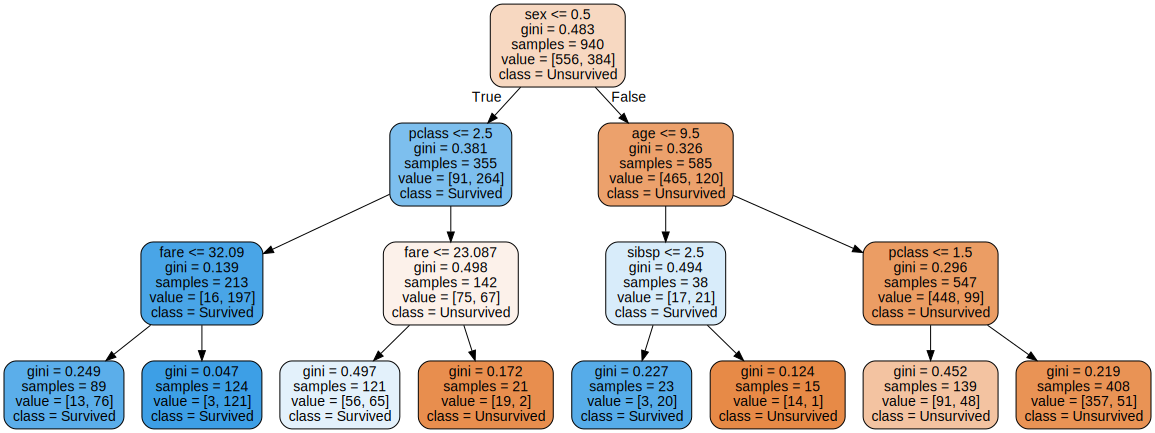

In [63]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(
        tree_clf,
        out_file="titanic.dot",
        feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
        class_names=['Unsurvived','Survived'],
        rounded=True,
        filled=True
    )

with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot

In [64]:
dicaprio = [3., 1., 19., 0., 0., 5.]
winslet = [1., 0., 17., 1., 1., 100.]

In [65]:
tree_clf.predict_proba([winslet])

array([[0.02419355, 0.97580645]])

In [66]:
tree_clf.predict_proba([dicaprio])

array([[0.875, 0.125]])

In [67]:
def isSurvived(name, person):
    isSurvive = 'not survived' if tree_clf.predict([person])[0] == 0 else 'survived'
    print(name, ' is ', isSurvive,
         ' --> ', max(tree_clf.predict_proba([person])[0]))
    
isSurvived('Dicaprio', dicaprio)
isSurvived('Winslet', winslet)

Dicaprio  is  not survived  -->  0.875
Winslet  is  survived  -->  0.9758064516129032
